In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys

os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/Design_MMI_LucasLobo/Lumerical')) #Current directory

In [2]:
nf = 3.476
ns = 1.444
espessuraTotal = 10e-6
lmbd = 1550e-9
c0 = 299792458
k0 = 2*np.pi/lmbd
numerodemodos = 1
sigma = 0
We = espessuraTotal + (lmbd/np.pi)*((ns/nf)**(2*sigma))*(nf**2 - ns**2)**(-1/2)
print(We)

1.0156040531990454e-05


In [3]:
mode = lumapi.MODE(filename= 'MMI2XN.lms')



In [13]:
mode.setnamed('TI1','y',(espessuraTotal/2 - espessuraTotal/12))
mode.setnamed('I1','y',(espessuraTotal/2 - espessuraTotal/12))
mode.setnamed('EME::Ports::port_1','y',(espessuraTotal/2 - espessuraTotal/12))


mode.setnamed('TO1','y',(espessuraTotal/2 - espessuraTotal/12))
mode.setnamed('O1','y',(espessuraTotal/2 - espessuraTotal/12))
mode.setnamed('EME::Ports::port_2','y',(espessuraTotal/2 - espessuraTotal/12))

mode.setnamed('TO2','y',(espessuraTotal/2 - 2*espessuraTotal/4 + espessuraTotal/12))
mode.setnamed('O2','y',(espessuraTotal/2 - 2*espessuraTotal/4 + espessuraTotal/12))
mode.setnamed('EME::Ports::port_3','y',(espessuraTotal/2 - 2*espessuraTotal/4 + espessuraTotal/12))

mode.setnamed('TO3','y',(espessuraTotal/2 - 2*espessuraTotal/4 - espessuraTotal/12))
mode.setnamed('O3','y',(espessuraTotal/2 - 2*espessuraTotal/4 - espessuraTotal/12))
mode.setnamed('EME::Ports::port_4','y',(espessuraTotal/2 - 2*espessuraTotal/4 - espessuraTotal/12))

mode.setnamed('TO4','y',(espessuraTotal/2 - 4*espessuraTotal/4 + espessuraTotal/12))     
mode.setnamed('O4','y',(espessuraTotal/2 - 4*espessuraTotal/4 + espessuraTotal/12))
mode.setnamed('EME::Ports::port_5','y',(espessuraTotal/2 - 4*espessuraTotal/4 + espessuraTotal/12))

In [12]:
mode.emepropagate()

LumApiError: 'emepropagate cannot be used while in layout mode.'

C:\Users\lucas\AppData\Local\Temp/ipykernel_23436/3672966686.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


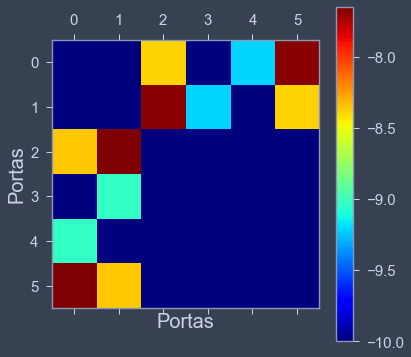

In [29]:
campo = mode.getresult('EME','user s matrix')
campo = abs(campo)**2
#campo = 10*np.log10(campo)
#[print(*line) for line in campo]
plt.matshow(10*np.log10(campo),cmap = 'jet',vmin=-10)
plt.xlabel('Portas',fontsize=20)
plt.ylabel('Portas',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.grid()
plt.savefig('MatrizS')

In [20]:
#np.savetxt('MatrizS.csv', campo, delimiter=',') 

In [21]:
mode.setemeanalysis("mode convergence sweep", 1)
mode.emesweep("mode convergence sweep")
modos = mode.getemesweep("S_mode_convergence_sweep")

KeyboardInterrupt: 

dict_keys(['modes', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


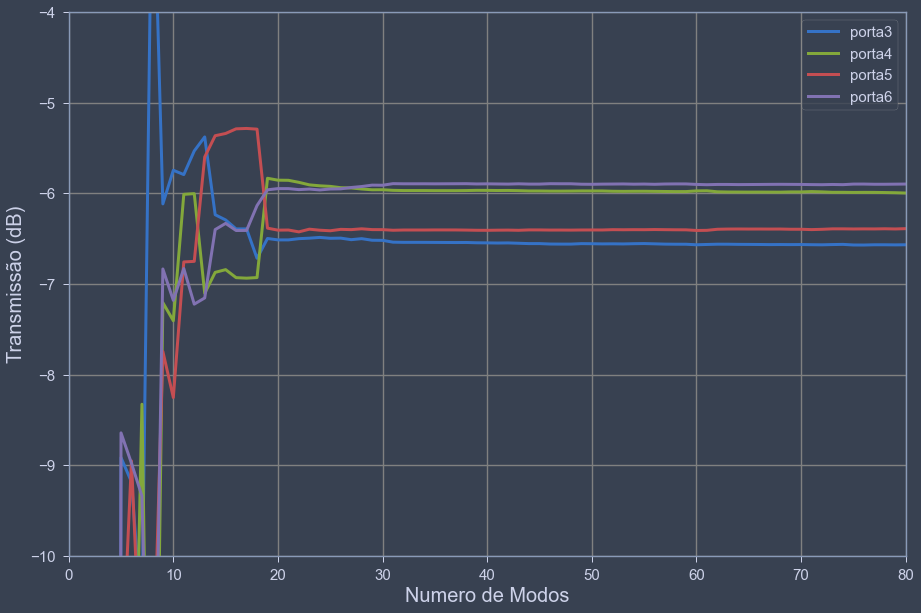

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
print(modos.keys())
x = modos['modes']
s13 = modos['s13']
s14 = modos['s14']
s15 = modos['s15']
s16 = modos['s16']

plt.plot(x,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-10,-5)
plt.yticks(np.arange(-10,-3,step=1),fontsize=15)
plt.xticks(np.arange(0,100,step=10),fontsize=15)
plt.xlim(0,80)
plt.xlabel('Numero de Modos',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid(color='grey')
plt.savefig('ConvergenciaModos')

In [ ]:
mode.setemeanalysis("wavelength sweep",1)
mode.emesweep("wavelength sweep")
comprimentos = mode.getemesweep("S_wavelength_sweep")

dict_keys(['wavelength', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


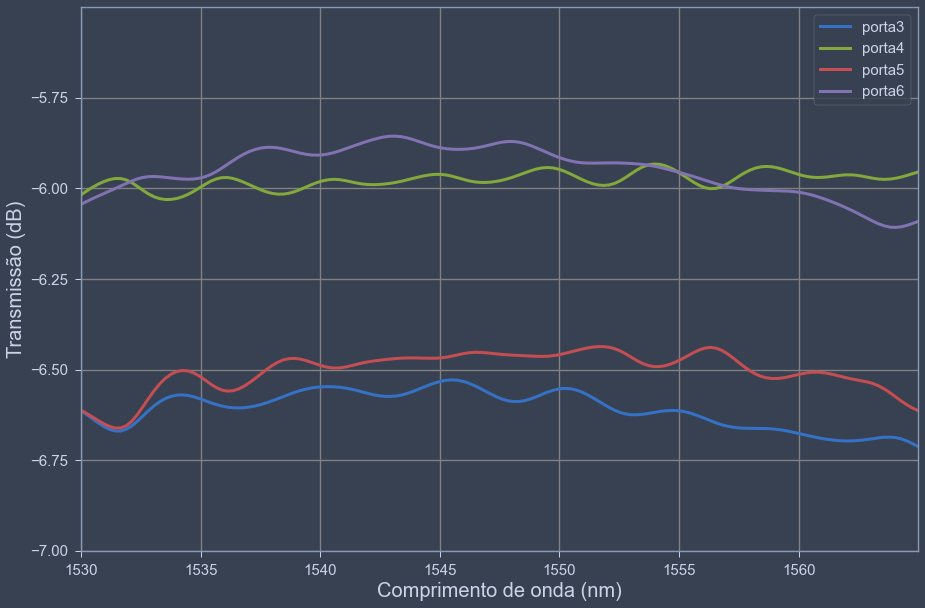

In [ ]:


plt.rcParams["figure.figsize"] = (15,10)
print(comprimentos.keys())
x = comprimentos['wavelength']
s13 = comprimentos['s13']
s14 = comprimentos['s14']
s15 = comprimentos['s15']
s16 = comprimentos['s16']

plt.plot(x*1e9,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-7,-5.5)
plt.xlim(1530,1565)
plt.yticks(np.arange(-7,-5.5,step=0.25),fontsize=15)
plt.xticks(np.arange(1530,1565,step=5),fontsize=15)
plt.xlabel('Comprimento de onda (nm)',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid(color='grey')
plt.savefig('sweepfrequencia')

In [ ]:
mode.setemeanalysis("propagation sweep",1)
mode.emesweep("propagation sweep")

dict_keys(['group_span_2', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


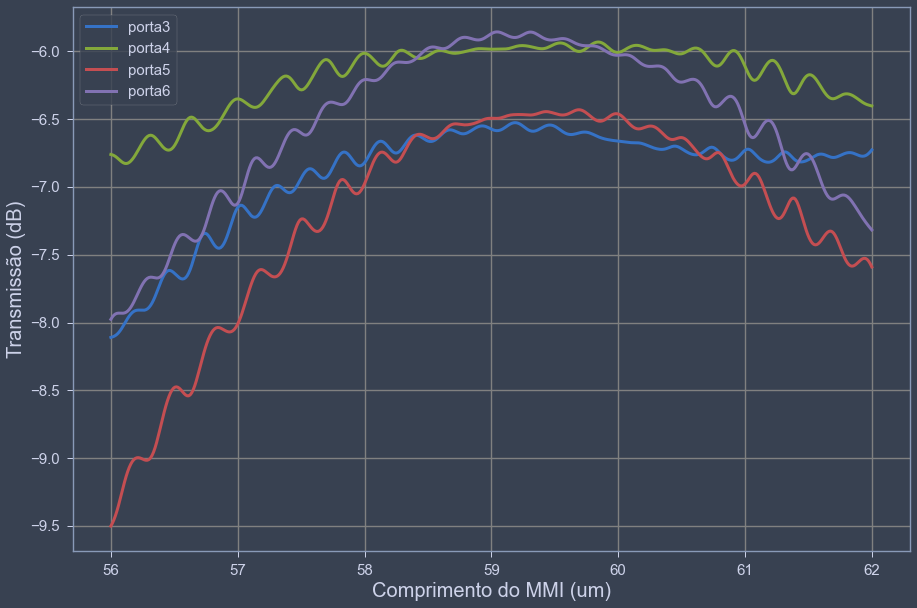

In [ ]:

largura = mode.getemesweep("S")

plt.rcParams["figure.figsize"] = (15,10)
print(largura.keys())
x = largura['group_span_2']
s13 = largura['s13']
s14 = largura['s14']
s15 = largura['s15']
s16 = largura['s16']

plt.plot(x*1e6,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x*1e6,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x*1e6,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x*1e6,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
#plt.ylim(-7,-5.5)
#plt.xlim(56,62)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Comprimento do MMI (um)',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid(color='grey')
plt.savefig('sweepcomprimento')

dict_keys(['lambda', 'f', 'x', 'y', 'z', 'E', 'H', 'Lumerical_dataset'])


C:\Users\lucas\AppData\Local\Temp/ipykernel_23436/3354644031.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
C:\Users\lucas\AppData\Local\Temp/ipykernel_23436/3354644031.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


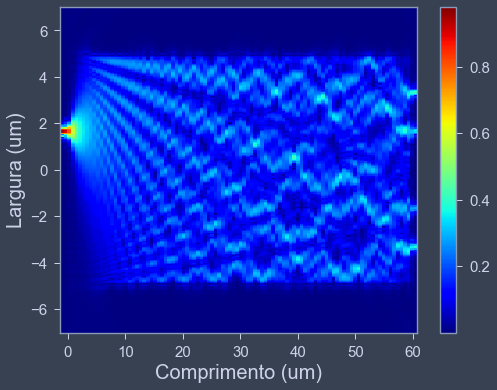

In [24]:
campo = mode.getresult('monitor','field profile')
print(campo.keys())
x = campo['x']
y = campo['y']
E = campo['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Comprimento (um)',fontsize=20)
plt.ylabel('Largura (um)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.savefig('E linear')


C:\Users\lucas\AppData\Local\Temp/ipykernel_23436/539426206.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
C:\Users\lucas\AppData\Local\Temp/ipykernel_23436/539426206.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(label='dB')


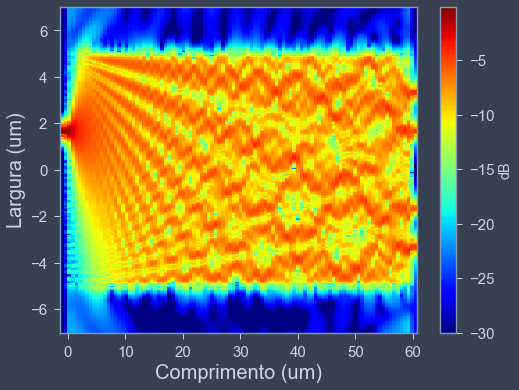

In [25]:
Elog = 10*np.log10(E)
plt.rcParams["figure.figsize"] = (8,6)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
plt.xlabel('Comprimento (um)',fontsize=20)
plt.ylabel('Largura (um)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=15)
plt.savefig('E Log')